In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot
from scipy.stats import johnsonsb, skewnorm, dgamma, genlogistic, dweibull, johnsonsu
import matplotlib.pyplot as plt

In [2]:
power_plants = pd.read_csv('../../../elecsim/data/processed/power_plants/uk_power_plants/uk_power_plants.csv')
power_plants

,Unnamed: 0,Unnamed: 0.1,Company,Name,Fuel,Capacity,Start_date,Simplified_Type
0,0,0,AES,Ballylumford B,Gas,540.0,1968.0,Recip_gas
1,1,1,AES,Ballylumford B OCGT,Gas oil,116.0,1968.0,Recip_diesel
2,2,2,AES,Ballylumford C,CCGT,616.0,2003.0,CCGT
3,3,3,AES,Kilroot OCGT,Gas oil,142.0,1981.0,Recip_diesel
4,4,4,AES,Kilroot,Coal,560.0,1981.0,Coal
...,...,...,...,...,...,...,...,...
1080,1088,1088,WPO,Workington (Voridian),Wind,4.0,2006.0,Onshore
1081,1089,1089,WPO,Wythegill,Wind,1.5,2015.0,Onshore
1082,1090,1090,WPO,Ysgellog,Wind,4.6,2013.0,Onshore
1083,1091,1091,Xceco,Inner Dowsing,Wind (offshore),97.2,2009.0,Offshore


In [3]:
company_capacities = power_plants.groupby("Company").Capacity.sum().to_frame().reset_index()
company_capacities.sort_values("Capacity", ascending=False)

,Company,Capacity
10,EDF Energy,14763.0
37,RWE Generation SE,8664.0
42,SSE,8390.7
54,Uniper UK Limited,6605.0
46,Scottish power,4471.5
8,Drax Power Ltd,4035.0
34,Orsted,2738.7
18,Engie,2675.0
26,Intergen,2490.0
13,EPUKi,2270.0


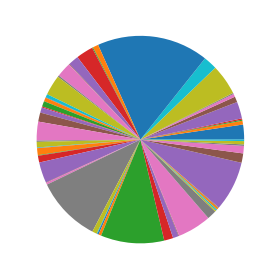

In [18]:
# company_capacities.plot.pie(y="Capacity")

plt.pie(company_capacities.Capacity)
plt.tight_layout()
plt.savefig('/Users/alexanderkell/Documents/PhD/Presentations/Power-Systems/figures/pie_plot.pdf', dpi=1000)



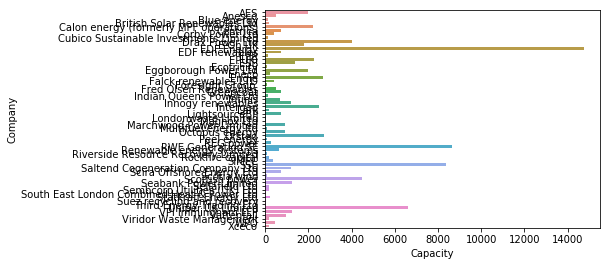

In [109]:
sns.barplot(data=company_capacities, y='Company', x="Capacity")

In [110]:
company_num_plants = power_plants.groupby("Company").Name.count().to_frame().reset_index()
company_num_plants.sort_values("Name", ascending=False)

,Company,Name
42,SSE,130
33,Octopus energy,121
28,LightsourceBP,100
1,Anesco,95
22,Greencoat,57
46,Scottish power,49
25,Innogy renewables,44
38,Renewable energy systems,38
58,WPO,37
9,E.On UK,36


In [128]:
company_stats = company_num_plants.merge(company_capacities, on="Company").sort_values("Capacity", ascending=False)
company_stats

,Company,Name,Capacity
10,EDF Energy,14,14763.0
37,RWE Generation SE,11,8664.0
42,SSE,130,8390.7
54,Uniper UK Limited,9,6605.0
46,Scottish power,49,4471.5
8,Drax Power Ltd,3,4035.0
34,Orsted,11,2738.7
18,Engie,3,2675.0
26,Intergen,3,2490.0
13,EPUKi,2,2270.0


In [112]:
company_stats['proportion'] = company_stats.Capacity/company_stats.Capacity.sum()*100
company_stats.to_csv("../data/company_list/company_stats.csv")


In [130]:
big_six = company_stats.head(6)
big_six['Name']
# big_six['Company'] = "\"" + big_six['Company'] + "\","
big_six.cumsum()

,Company,Name,Capacity
10,EDF Energy,14,14763
37,EDF EnergyRWE Generation SE,25,23427
42,EDF EnergyRWE Generation SESSE,155,31817.7
54,EDF EnergyRWE Generation SESSEUniper UK Limited,164,38422.7
46,EDF EnergyRWE Generation SESSEUniper UK Limite...,213,42894.2
8,EDF EnergyRWE Generation SESSEUniper UK Limite...,216,46929.2


In [114]:
import pickle
from fitter import Fitter
import fitter
result_distributions_object = pickle.load(open("/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/run/Compare_worlds/result_distributions_object.p", "rb"))

In [115]:
resultant_dist = '{}'

dist_class = eval(list(result_distributions_object[resultant_dist].fitted_param.keys())[0] + ".rvs")
dist_object = dist_class(*list(result_distributions_object[resultant_dist].fitted_param.values())[0], size=50000).tolist()
dist_object


[1771.5361326130849,
 3782.5795661853604,
 1348.8939358622815,
 750.4826291443007,
 861.5065089771145,
 2419.9181934555645,
 778.1402199007642,
 2081.9322853606423,
 4928.884094022106,
 253.92261562493232,
 292.28662691368766,
 -142.05014202836978,
 833.2875231631728,
 -1721.3150304899043,
 645.8576415813421,
 943.8236309411345,
 -2470.242599402383,
 -1147.9565170776323,
 -899.0517876369777,
 459.4299517006844,
 3812.4190733848422,
 1663.9422381109723,
 1358.0003707044932,
 360.0094504469997,
 -4412.432522664499,
 -3746.484772794082,
 1477.1245904573184,
 -6946.490896038629,
 -61.07601194148151,
 -3126.9833409393673,
 -2417.727142995527,
 1144.1246067074126,
 446.2780306361468,
 -4705.459260305395,
 -1142.52026407015,
 -1813.2808406686836,
 1079.7283625347181,
 -2994.5890589975656,
 776.6351457723237,
 636.2270257925659,
 -409.33793681499264,
 3774.9179898066454,
 -420.8136658481281,
 -2217.658856682731,
 -726.7509896828653,
 -7015.650109444916,
 -6409.76038672393,
 1121.477766326055,
